In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import geoplot as gplt

In [3]:
import geopandas as gpd

In [45]:
from shapely.geometry import polygon, point

In [167]:
from pyproj import Proj, transform

In [4]:
file_tracts = '../resource_files/bexar_county/Bexar_County_Census_Tracts-shp/Bexar_County_Census_Tracts.shp'
file_block_groups = '../resource_files/bexar_county/Bexar_County_Census_Block_Groups-shp/Bexar_County_Census_Block_Groups.shp'
file_blocks = '../resource_files/bexar_county/Bexar_County_Census_Blocks-shp/Bexar_County_Census_Blocks.shp'
file_stops =  '../resource_files/google_transit/stops.csv'

In [5]:
gdf_tracts = gpd.read_file(file_tracts).set_index('TRACT')

In [6]:
gdf_tracts['density']=gdf_tracts.SUM_POPULA / gdf_tracts.ShapeSTAre.min()

In [7]:
gdf_tracts.head()

OBJECTID  SUM_POPULA    ShapeSTAre    ShapeSTLen  \
TRACT                                                           
48029110100         1        3379  3.816858e+07  26074.749275   
48029110300         2        2542  1.667905e+07  22363.990201   
48029110500         3        2238  1.366653e+07  16048.493069   
48029110600         4        7553  2.117379e+07  20426.412628   
48029110700         5        1398  1.058371e+07  16998.776148   

                                                      geometry   density  
TRACT                                                                     
48029110100  POLYGON ((-98.48695 29.43502, -98.48626 29.434...  0.000433  
48029110300  POLYGON ((-98.47326 29.41461, -98.47326 29.413...  0.000325  
48029110500  POLYGON ((-98.50799 29.42314, -98.50812 29.422...  0.000287  
48029110600  POLYGON ((-98.50111 29.42735, -98.50121 29.426...  0.000967  
48029110700  POLYGON ((-98.50401 29.44202, -98.50386 29.441...  0.000179

In [8]:
gdf_block_groups = gpd.read_file(file_block_groups).set_index('BLOCKGROUP')

In [9]:
gdf_block_groups['density']=gdf_block_groups.SUM_POPULA / gdf_block_groups.ShapeSTAre.min()

In [10]:
gdf_block_groups.head()

OBJECTID  SUM_POPULA    Shape_STAr    Shape_STLe    ShapeSTAre  \
BLOCKGROUP                                                                     
480291101001         1         955  1.951706e+07  23279.128568  1.951706e+07   
480291101002         2         694  7.319464e+06  14609.297870  7.319464e+06   
480291101003         3        1730  1.133205e+07  14546.232289  1.133205e+07   
480291103001         4        1041  4.292228e+06   9662.074836  4.292228e+06   
480291103002         5         797  4.074139e+06  10523.204970  4.074139e+06   

                ShapeSTLen                                           geometry  \
BLOCKGROUP                                                                      
480291101001  23279.128568  POLYGON ((-98.48695 29.43502, -98.48626 29.434...   
480291101002  14609.297870  POLYGON ((-98.48824 29.41933, -98.48826 29.418...   
480291101003  14546.232289  POLYGON ((-98.49432 29.43370, -98.49426 29.433...   
480291103001   9662.074836  POLYGON ((-98.47984 29.40970, -98.47983 29.409...   
480291103002  10523.204970  POLYGON ((-98.47989 29.40860, -98.47992 29.408...   

               density  
BLOCKGROUP              
480291101001  0.000547  
480291101002  0.000398  
480291101003  0.000991  
480291103001  0.000596  
480291103002  0.000457

In [11]:
gdf_block_groups[gdf_block_groups.SUM_POPULA == 0]

OBJECTID  SUM_POPULA    Shape_STAr    Shape_STLe    ShapeSTAre  \
BLOCKGROUP                                                                     
480299800041      1082           0  1.053470e+08  49901.049403  1.053470e+08   

                ShapeSTLen                                           geometry  \
BLOCKGROUP                                                                      
480299800041  49901.049403  POLYGON ((-98.45853 29.54689, -98.45767 29.546...   

              density  
BLOCKGROUP             
480299800041      0.0

In [12]:
gdf_blocks = gpd.read_file(file_blocks).set_index('BLOCK')

In [13]:
gdf_blocks['density']=gdf_blocks.POPULATION / gdf_blocks.ShapeSTAre.min()

In [14]:
gdf_blocks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 26452 entries, 480291919003005 to 480291317001070
Columns: 259 entries, OBJECTID to density
dtypes: float64(4), geometry(1), int64(225), object(29)
memory usage: 52.5+ MB


In [15]:
gdf_blocks.columns.to_list()

['OBJECTID',
 'ID',
 'COLORING',
 'BLOCKGROUP',
 'TRACT',
 'COUNTY',
 'STATE',
 'BLOCK2000',
 'MCD',
 'SUBMCD',
 'PLACE',
 'CONCITY',
 'VTD',
 'CONGRESS',
 'LOWERSLD',
 'UPPERSLD',
 'COUNTYLD',
 'CITYLD',
 'INDIAN',
 'TRUST',
 'TRIBALSUB',
 'ANRC',
 'CSA',
 'CBSA',
 'CBSADIV',
 'UA',
 'UGA',
 'ELEMSCHOOL',
 'SECSCHOOL',
 'UNIFSCHOOL',
 'ZIP5',
 'URBANRURAL',
 'POPULATION',
 'WHITE',
 'BLACK',
 'AMINDIAN',
 'ASIAN',
 'HAWAIIAN',
 'OTHER',
 'WHTBLK',
 'WHTIND',
 'WHTASN',
 'WHTHWN',
 'WHTOTH',
 'BLKIND',
 'BLKASN',
 'BLKHWN',
 'BLKOTH',
 'INDASN',
 'INDHWN',
 'INDOTH',
 'ASNHWN',
 'ASNOTH',
 'HWNOTH',
 'WHTBLKIND',
 'WHTBLKASN',
 'WHTBLKHWN',
 'WHTBLKOTH',
 'WHTINDASN',
 'WHTINDHWN',
 'WHTINDOTH',
 'WHTASNHWN',
 'WHTASNOTH',
 'WHTHWNOTH',
 'BLKINDASN',
 'BLKINDHWN',
 'BLKINDOTH',
 'BLKASNHWN',
 'BLKASNOTH',
 'BLKHWNOTH',
 'INDASNHWN',
 'INDASNOTH',
 'INDHWNOTH',
 'ASNHWNOTH',
 'WHTBLKINDA',
 'WHTBLKINDH',
 'WHTBLKINDO',
 'WHTBLKASNH',
 'WHTBLKASNO',
 'WHTBLKHWNO',
 'WHTINDASNH',
 'WHTIND

In [16]:
gdf_blocks.MCD.value_counts()

4802993407    12969
4802993409     3595
4802993411     3166
4802993412     2634
4802993414     1853
4802993413     1284
4802993408      951
Name: MCD, dtype: int64

In [17]:
gdf_blocks.SUBMCD.value_counts()

Series([], Name: SUBMCD, dtype: int64)

In [18]:
gdf_blocks.PLACE.value_counts()

4865000    19293
4816468      274
4874408      260
4801600      209
4860608      205
4843096      191
4842388      181
4873057      133
4872296      131
4840036      130
4839448      124
4879672      119
4813276      112
4833146      111
4866704      106
4866128       79
4866089       77
4853988       77
4823272       76
4834628       67
4867268       59
4825168       58
4868708       47
4864172       46
4805384       45
4817811       42
4875764       41
4845576       38
4833968       26
4831100       21
4814716       21
4845288        6
4814920        1
Name: PLACE, dtype: int64

In [19]:
gdf_blocks.VTD.value_counts()

480294001    386
480293097    275
480294007    271
480291058    270
480294074    221
            ... 
480292122      1
480293155      1
480294035      1
480291090      1
480294140      1
Name: VTD, Length: 620, dtype: int64

In [20]:
gdf_blocks.LOWERSLD.value_counts()

48118    3428
48122    3332
48123    3077
48117    3053
48120    2976
48119    2779
48121    2230
48116    1979
48124    1940
48125    1658
Name: LOWERSLD, dtype: int64

In [21]:
gdf_blocks.UPPERSLD.value_counts()

48026    10412
48019     8228
48025     5361
48021     2451
Name: UPPERSLD, dtype: int64

In [22]:
gdf_blocks.CBSA.value_counts()

41700    26452
Name: CBSA, dtype: int64

In [23]:
gdf_blocks.CBSA.value_counts()

41700    26452
Name: CBSA, dtype: int64

In [24]:
gdf_blocks.UNIFSCHOOL.value_counts()

4838730    7222
4833120    5282
4832940    4447
4824990    1464
4817850    1094
4818150    1046
4822470     933
4840950     874
4807590     743
4840680     706
4840920     565
4840740     391
4810710     290
4814730     283
4820160     267
4839480     229
4836450     220
4826370     218
4830060     171
4819350       7
Name: UNIFSCHOOL, dtype: int64

In [25]:
keep_cols = [
    'OBJECTID',
    'ID',
    'COLORING',
#     'BLOCK',
    'BLOCKGROUP',
#     'TRACT',
#     'COUNTY',
#     'STATE',
#     'BLOCK2000',
    'MCD',
#     'SUBMCD',
    'PLACE',
#     'CONCITY',
    'VTD',
    'CONGRESS',
    'LOWERSLD',
    'UPPERSLD',
#     'COUNTYLD',
#     'CITYLD',
#     'INDIAN',
#     'TRUST',
#     'TRIBALSUB',
#     'ANRC',
#     'CSA',
#     'CBSA',
#     'CBSADIV',
#     'UA',
#     'UGA',
#     'ELEMSCHOOL',
#     'SECSCHOOL',
    'UNIFSCHOOL',
#     'ZIP5',
#     'URBANRURAL',
    'POPULATION',
#     'WHITE',
#     'BLACK',
#     'AMINDIAN',
#     'ASIAN',
#     'HAWAIIAN',
#     'OTHER',
#     'WHTBLK',
#     'WHTIND',
#     'WHTASN',
#     'WHTHWN',
#     'WHTOTH',
#     'BLKIND',
#     'BLKASN',
#     'BLKHWN',
#     'BLKOTH',
#     'INDASN',
#     'INDHWN',
#     'INDOTH',
#     'ASNHWN',
#     'ASNOTH',
#     'HWNOTH',
#     'WHTBLKIND',
#     'WHTBLKASN',
#     'WHTBLKHWN',
#     'WHTBLKOTH',
#     'WHTINDASN',
#     'WHTINDHWN',
#     'WHTINDOTH',
#     'WHTASNHWN',
#     'WHTASNOTH',
#     'WHTHWNOTH',
#     'BLKINDASN',
#     'BLKINDHWN',
#     'BLKINDOTH',
#     'BLKASNHWN',
#     'BLKASNOTH',
#     'BLKHWNOTH',
#     'INDASNHWN',
#     'INDASNOTH',
#     'INDHWNOTH',
#     'ASNHWNOTH',
#     'WHTBLKINDA',
#     'WHTBLKINDH',
#     'WHTBLKINDO',
#     'WHTBLKASNH',
#     'WHTBLKASNO',
#     'WHTBLKHWNO',
#     'WHTINDASNH',
#     'WHTINDASNO',
#     'WHTINDHWNO',
#     'WHTASNHWNO',
#     'BLKINDASNH',
#     'BLKINDASNO',
#     'BLKINDHWNO',
#     'BLKASNHWNO',
#     'INDASNHWNO',
#     'WHTBLKIND1',
#     'WHTBLKIND2',
#     'WHTBLKIND3',
#     'WHTBLKASN1',
#     'WHTINDASN1',
#     'BLKINDASN1',
#     'ALL_RACES',
#     'AP_WHT',
#     'NP_WHT',
#     'AP_BLK',
#     'NP_BLK',
#     'AP_IND',
#     'NP_IND',
#     'AP_ASN',
#     'NP_ASN',
#     'AP_HWN',
#     'NP_HWN',
#     'AP_OTH',
#     'NP_OTH',
#     'F1_RACE',
#     'F2_RACES',
#     'F2_RACES1',
#     'F3_RACES',
#     'F4_RACES',
#     'F5_RACES',
    'HISPANIC_O',
    'NOT_HISPAN',
    'NH_WHT',
    'NH_BLK',
#     'NH_IND',
    'NH_ASN',
#     'NH_HWN',
#     'NH_OTH',
#     'NH_WHTBLK',
#     'NH_WHTIND',
#     'NH_WHTASN',
#     'NH_WHTHWN',
#     'NH_WHTOTH',
#     'NH_BLKIND',
#     'NH_BLKASN',
#     'NH_BLKHWN',
#     'NH_BLKOTH',
#     'NH_INDASN',
#     'NH_INDHWN',
#     'NH_INDOTH',
#     'NH_ASNHWN',
#     'NH_ASNOTH',
#     'NH_HWNOTH',
#     'NH_WHTBLKI',
#     'NH_WHTBLKA',
#     'NH_WHTBLKH',
#     'NH_WHTBLKO',
#     'NH_WHTINDA',
#     'NH_WHTINDH',
#     'NH_WHTINDO',
#     'NH_WHTASNH',
#     'NH_WHTASNO',
#     'NH_WHTHWNO',
#     'NH_BLKINDA',
#     'NH_BLKINDH',
#     'NH_BLKINDO',
#     'NH_BLKASNH',
#     'NH_BLKASNO',
#     'NH_BLKHWNO',
#     'NH_INDASNH',
#     'NH_INDASNO',
#     'NH_INDHWNO',
#     'NH_ASNHWNO',
#     'NH_WHTBLK1',
#     'NH_WHTBLK2',
#     'NH_WHTBLK3',
#     'NH_WHTBLK4',
#     'NH_WHTBLK5',
#     'NH_WHTBLK6',
#     'NH_WHTIND1',
#     'NH_WHTIND2',
#     'NH_WHTIND3',
#     'NH_WHTASN1',
#     'NH_BLKIND1',
#     'NH_BLKIND2',
#     'NH_BLKIND3',
#     'NH_BLKASN1',
#     'NH_INDASN1',
#     'NH_WHTBLK7',
#     'NH_WHTBLK8',
#     'NH_WHTBLK9',
#     'NH_WHTBL10',
#     'NH_WHTIND4',
#     'NH_BLKIND4',
#     'NH_ALL_RAC',
#     'NH_AP_WHT',
#     'NH_NP_WHT',
#     'NH_AP_BLK',
#     'NH_NP_BLK',
#     'NH_AP_IND',
#     'NH_NP_IND',
#     'NH_AP_ASN',
#     'NH_NP_ASN',
#     'NH_AP_HWN',
#     'NH_NP_HWN',
#     'NH_AP_OTH',
#     'NH_NP_OTH',
#     'NH_1_RACE',
#     'NH_2_RACES',
#     'NH_2_RACE1',
#     'NH_3_RACES',
#     'NH_4_RACES',
#     'NH_5_RACES',
#     'NH_DOJ_BLK',
#     'NH_DOJ_IND',
#     'NH_DOJ_ASN',
#     'NH_DOJ_HWN',
#     'NH_DOJ_OTH',
#     'NH_DOJ_OT1',
#     'F18_POP',
#     'F18_WHT',
#     'F18_BLK',
#     'F18_IND',
#     'F18_ASN',
#     'F18_HWN',
#     'F18_OTH',
#     'F18_WHTBLK',
#     'F18_WHTIND',
#     'F18_WHTASN',
#     'F18_WHTHWN',
#     'F18_WHTOTH',
#     'F18_BLKIND',
#     'F18_BLKASN',
#     'F18_BLKHWN',
#     'F18_BLKOTH',
#     'F18_INDASN',
#     'F18_INDHWN',
#     'F18_INDOTH',
#     'F18_ASNHWN',
#     'F18_ASNOTH',
#     'F18_HWNOTH',
#     'F18_WHTBL1',
#     'F18_WHTBL2',
#     'F18_WHTBL3',
#     'F18_WHTBL4',
#     'F18_WHTIN1',
#     'F18_WHTIN2',
#     'F18_WHTIN3',
#     'F18_WHTAS1',
#     'F18_WHTAS2',
#     'F18_WHTHW1',
#     'F18_BLKIN1',
#     'F18_BLKIN2',
#     'F18_BLKIN3',
#     'F18_BLKAS1',
#     'F18_BLKAS2',
#     'F18_BLKHW1',
#     'F18_INDAS1',
#     'F18_INDAS2',
#     'F18_INDHW1',
#     'F18_ASNHW1',
#     'F18_WHTBL5',
#     'F18_WHTBL6',
#     'F18_WHTBL7',
#     'F18_WHTBL8',
#     'F18_WHTBL9',
#     'F18_WHTB10',
#     'F18_WHTIN4',
#     'F18_WHTIN5',
#     'F18_WHTIN6',
    'gecovector',
    'ShapeSTAre',
    'ShapeSTLen',
    
    'density',
    
    'geometry'
]

In [26]:
gdf_blocks = gdf_blocks[keep_cols]

In [27]:
gdf_blocks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 26452 entries, 480291919003005 to 480291317001070
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    26452 non-null  int64   
 1   ID          26452 non-null  int64   
 2   COLORING    26452 non-null  int64   
 3   BLOCKGROUP  26452 non-null  object  
 4   MCD         26452 non-null  object  
 5   PLACE       22406 non-null  object  
 6   VTD         26452 non-null  object  
 7   CONGRESS    26452 non-null  object  
 8   LOWERSLD    26452 non-null  object  
 9   UPPERSLD    26452 non-null  object  
 10  UNIFSCHOOL  26452 non-null  object  
 11  POPULATION  26452 non-null  int64   
 12  HISPANIC_O  26452 non-null  int64   
 13  NOT_HISPAN  26452 non-null  int64   
 14  NH_WHT      26452 non-null  int64   
 15  NH_BLK      26452 non-null  int64   
 16  NH_ASN      26452 non-null  int64   
 17  gecovector  26452 non-null  float64 
 18  ShapeSTAre  26452 n

In [28]:
gdf_blocks.head()

OBJECTID       ID  COLORING    BLOCKGROUP         MCD  \
BLOCK                                                                    
480291919003005         1  1400310         4  480291919003  4802993407   
480291411011002         2  1400328         3  480291411011  4802993407   
480291411011006         3  1400348         3  480291411011  4802993407   
480291410002007         4  1400365         1  480291410002  4802993407   
480291410002006         5  1400383         3  480291410002  4802993407   

                   PLACE        VTD CONGRESS LOWERSLD UPPERSLD  ...  \
BLOCK                                                           ...   
480291919003005  4865000  480294004     4821    48120    48019  ...   
480291411011002  4865000  480291074     4823    48119    48019  ...   
480291411011006  4865000  480291074     4823    48119    48019  ...   
480291410002007  4865000  480291074     4823    48119    48019  ...   
480291410002006  4865000  480291074     4823    48119    48019  ...   

                HISPANIC_O  NOT_HISPAN  NH_WHT  NH_BLK  NH_ASN  gecovector  \
BLOCK                                                                        
480291919003005         11           2       0       0       0    0.001038   
480291411011002          0           0       0       0       0    0.018304   
480291411011006         82          20      16       2       0    0.012803   
480291410002007        149          13      13       0       0    0.012892   
480291410002006        124           9       5       4       0    0.016129   

                    ShapeSTAre   ShapeSTLen   density  \
BLOCK                                                   
480291919003005   28896.121094  1063.271402  0.247499   
480291411011002  509512.736328  8615.618889  0.000000   
480291411011006  356394.378906  2836.366689  1.941918   
480291410002007  358877.382812  2852.304380  3.084223   
480291410002006  448943.710938  2994.127235  2.532109   

                                                          geometry  
BLOCK                                                               
480291919003005  POLYGON ((-98.46781 29.42506, -98.46783 29.424...  
480291411011002  POLYGON ((-98.46881 29.36511, -98.46815 29.364...  
480291411011006  POLYGON ((-98.46323 29.36640, -98.46324 29.365...  
480291410002007  POLYGON ((-98.46667 29.36662, -98.46668 29.367...  
480291410002006  POLYGON ((-98.46668 29.36753, -98.46667 29.368...  

[5 rows x 22 columns]

In [29]:
gdf_blocks[['BLOCKGROUP','POPULATION']][gdf_blocks.POPULATION == 0].groupby('BLOCKGROUP').count().rename(columns={'POPULATION': 'Blocks'})

Blocks
BLOCKGROUP          
480291101001     132
480291101002      50
480291101003      68
480291103001      19
480291103002       4
...              ...
480299800021      39
480299800031      86
480299800041      57
480299800051       3
480299801001     167

[806 rows x 1 columns]

In [30]:
chk_cols = [
#     'BLOCK',
    'POPULATION',
    'NH_WHT',
    'NH_BLK',
    'NH_ASN',
    'HISPANIC_O',
    'NOT_HISPAN',
    
]

In [31]:
gdf_chk = gdf_blocks[chk_cols]

In [32]:
gdf_chk

POPULATION  NH_WHT  NH_BLK  NH_ASN  HISPANIC_O  NOT_HISPAN
BLOCK                                                                      
480291919003005          13       0       0       0          11           2
480291411011002           0       0       0       0           0           0
480291411011006         102      16       2       0          82          20
480291410002007         162      13       0       0         149          13
480291410002006         133       5       4       0         124           9
...                     ...     ...     ...     ...         ...         ...
480291317001083           0       0       0       0           0           0
480291317001082           0       0       0       0           0           0
480291317001081           0       0       0       0           0           0
480291317001071           0       0       0       0           0           0
480291317001070           0       0       0       0           0           0

[26452 rows x 6 columns]

In [33]:
df_stops = pd.read_csv(file_stops).set_index('stop_id')

In [34]:
df_stops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6491 entries, 25316 to 74369
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stop_code            6491 non-null   int64  
 1   stop_name            6491 non-null   object 
 2   stop_desc            1608 non-null   object 
 3   stop_lat             6491 non-null   float64
 4   stop_lon             6491 non-null   float64
 5   zone_id              0 non-null      float64
 6   stop_url             0 non-null      float64
 7   location_type        0 non-null      float64
 8   parent_station       0 non-null      float64
 9   stop_timezone        0 non-null      float64
 10  wheelchair_boarding  6491 non-null   int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 608.5+ KB


In [35]:
df_stops.describe()

stop_code     stop_lat     stop_lon  zone_id  stop_url  \
count   6491.000000  6491.000000  6491.000000      0.0       0.0   
mean   55405.448313    29.455182   -98.522178      NaN       NaN   
std    27111.251565     0.064817     0.077617      NaN       NaN   
min    10013.000000    29.294060   -98.711000      NaN       NaN   
25%    29846.000000    29.408544   -98.573360      NaN       NaN   
50%    55429.000000    29.450496   -98.517246      NaN       NaN   
75%    79626.500000    29.503407   -98.468857      NaN       NaN   
max    99996.000000    29.650497   -98.306921      NaN       NaN   

       location_type  parent_station  stop_timezone  wheelchair_boarding  
count            0.0             0.0            0.0               6491.0  
mean             NaN             NaN            NaN                  0.0  
std              NaN             NaN            NaN                  0.0  
min              NaN             NaN            NaN                  0.0  
25%              NaN             NaN            NaN                  0.0  
50%              NaN             NaN            NaN                  0.0  
75%              NaN             NaN            NaN                  0.0  
max              NaN             NaN            NaN                  0.0

In [105]:
df_stops = df_stops[['stop_code', 'stop_name', 'stop_lat', 'stop_lon', 'wheelchair_boarding']]

In [106]:
df_stops.head()

stop_code                       stop_name   stop_lat   stop_lon  \
stop_id                                                                    
25316        25316                BLANCO & DRESDEN  29.499014 -98.507783   
72479        72479     FRESNO & IH-10 W ACCESS RD.  29.474488 -98.516238   
56239        56239  FREDERICKSBURG RD. & N. FLORES  29.441883 -98.503773   
76759        76759                MARTIN & N. FRIO  29.430081 -98.503058   
88973        88973            DOLOROSA & S. FLORES  29.424073 -98.494741   

         wheelchair_boarding  
stop_id                       
25316                      0  
72479                      0  
56239                      0  
76759                      0  
88973                      0

In [107]:
df_stops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6491 entries, 25316 to 74369
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stop_code            6491 non-null   int64  
 1   stop_name            6491 non-null   object 
 2   stop_lat             6491 non-null   float64
 3   stop_lon             6491 non-null   float64
 4   wheelchair_boarding  6491 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 304.3+ KB


In [108]:
gdf_stops = gpd.GeoDataFrame(
    df_stops,
    geometry = gpd.points_from_xy(df_stops.stop_lon, df_stops.stop_lat),
    crs={'init': 'epsg:4326'}
)

In [109]:
gdf_stops.crs

{'init': 'epsg:4326'}

In [40]:
gdf_stops.head()

stop_code                       stop_name   stop_lat   stop_lon  \
stop_id                                                                    
25316        25316                BLANCO & DRESDEN  29.499014 -98.507783   
72479        72479     FRESNO & IH-10 W ACCESS RD.  29.474488 -98.516238   
56239        56239  FREDERICKSBURG RD. & N. FLORES  29.441883 -98.503773   
76759        76759                MARTIN & N. FRIO  29.430081 -98.503058   
88973        88973            DOLOROSA & S. FLORES  29.424073 -98.494741   

         wheelchair_boarding                    geometry  
stop_id                                                   
25316                      0  POINT (-98.50778 29.49901)  
72479                      0  POINT (-98.51624 29.47449)  
56239                      0  POINT (-98.50377 29.44188)  
76759                      0  POINT (-98.50306 29.43008)  
88973                      0  POINT (-98.49474 29.42407)

In [41]:
gdf_county = gdf_tracts[['geometry']].copy()

gdf_county['county'] = 'Bexar'
gdf_county = gdf_county.dissolve(by='county')

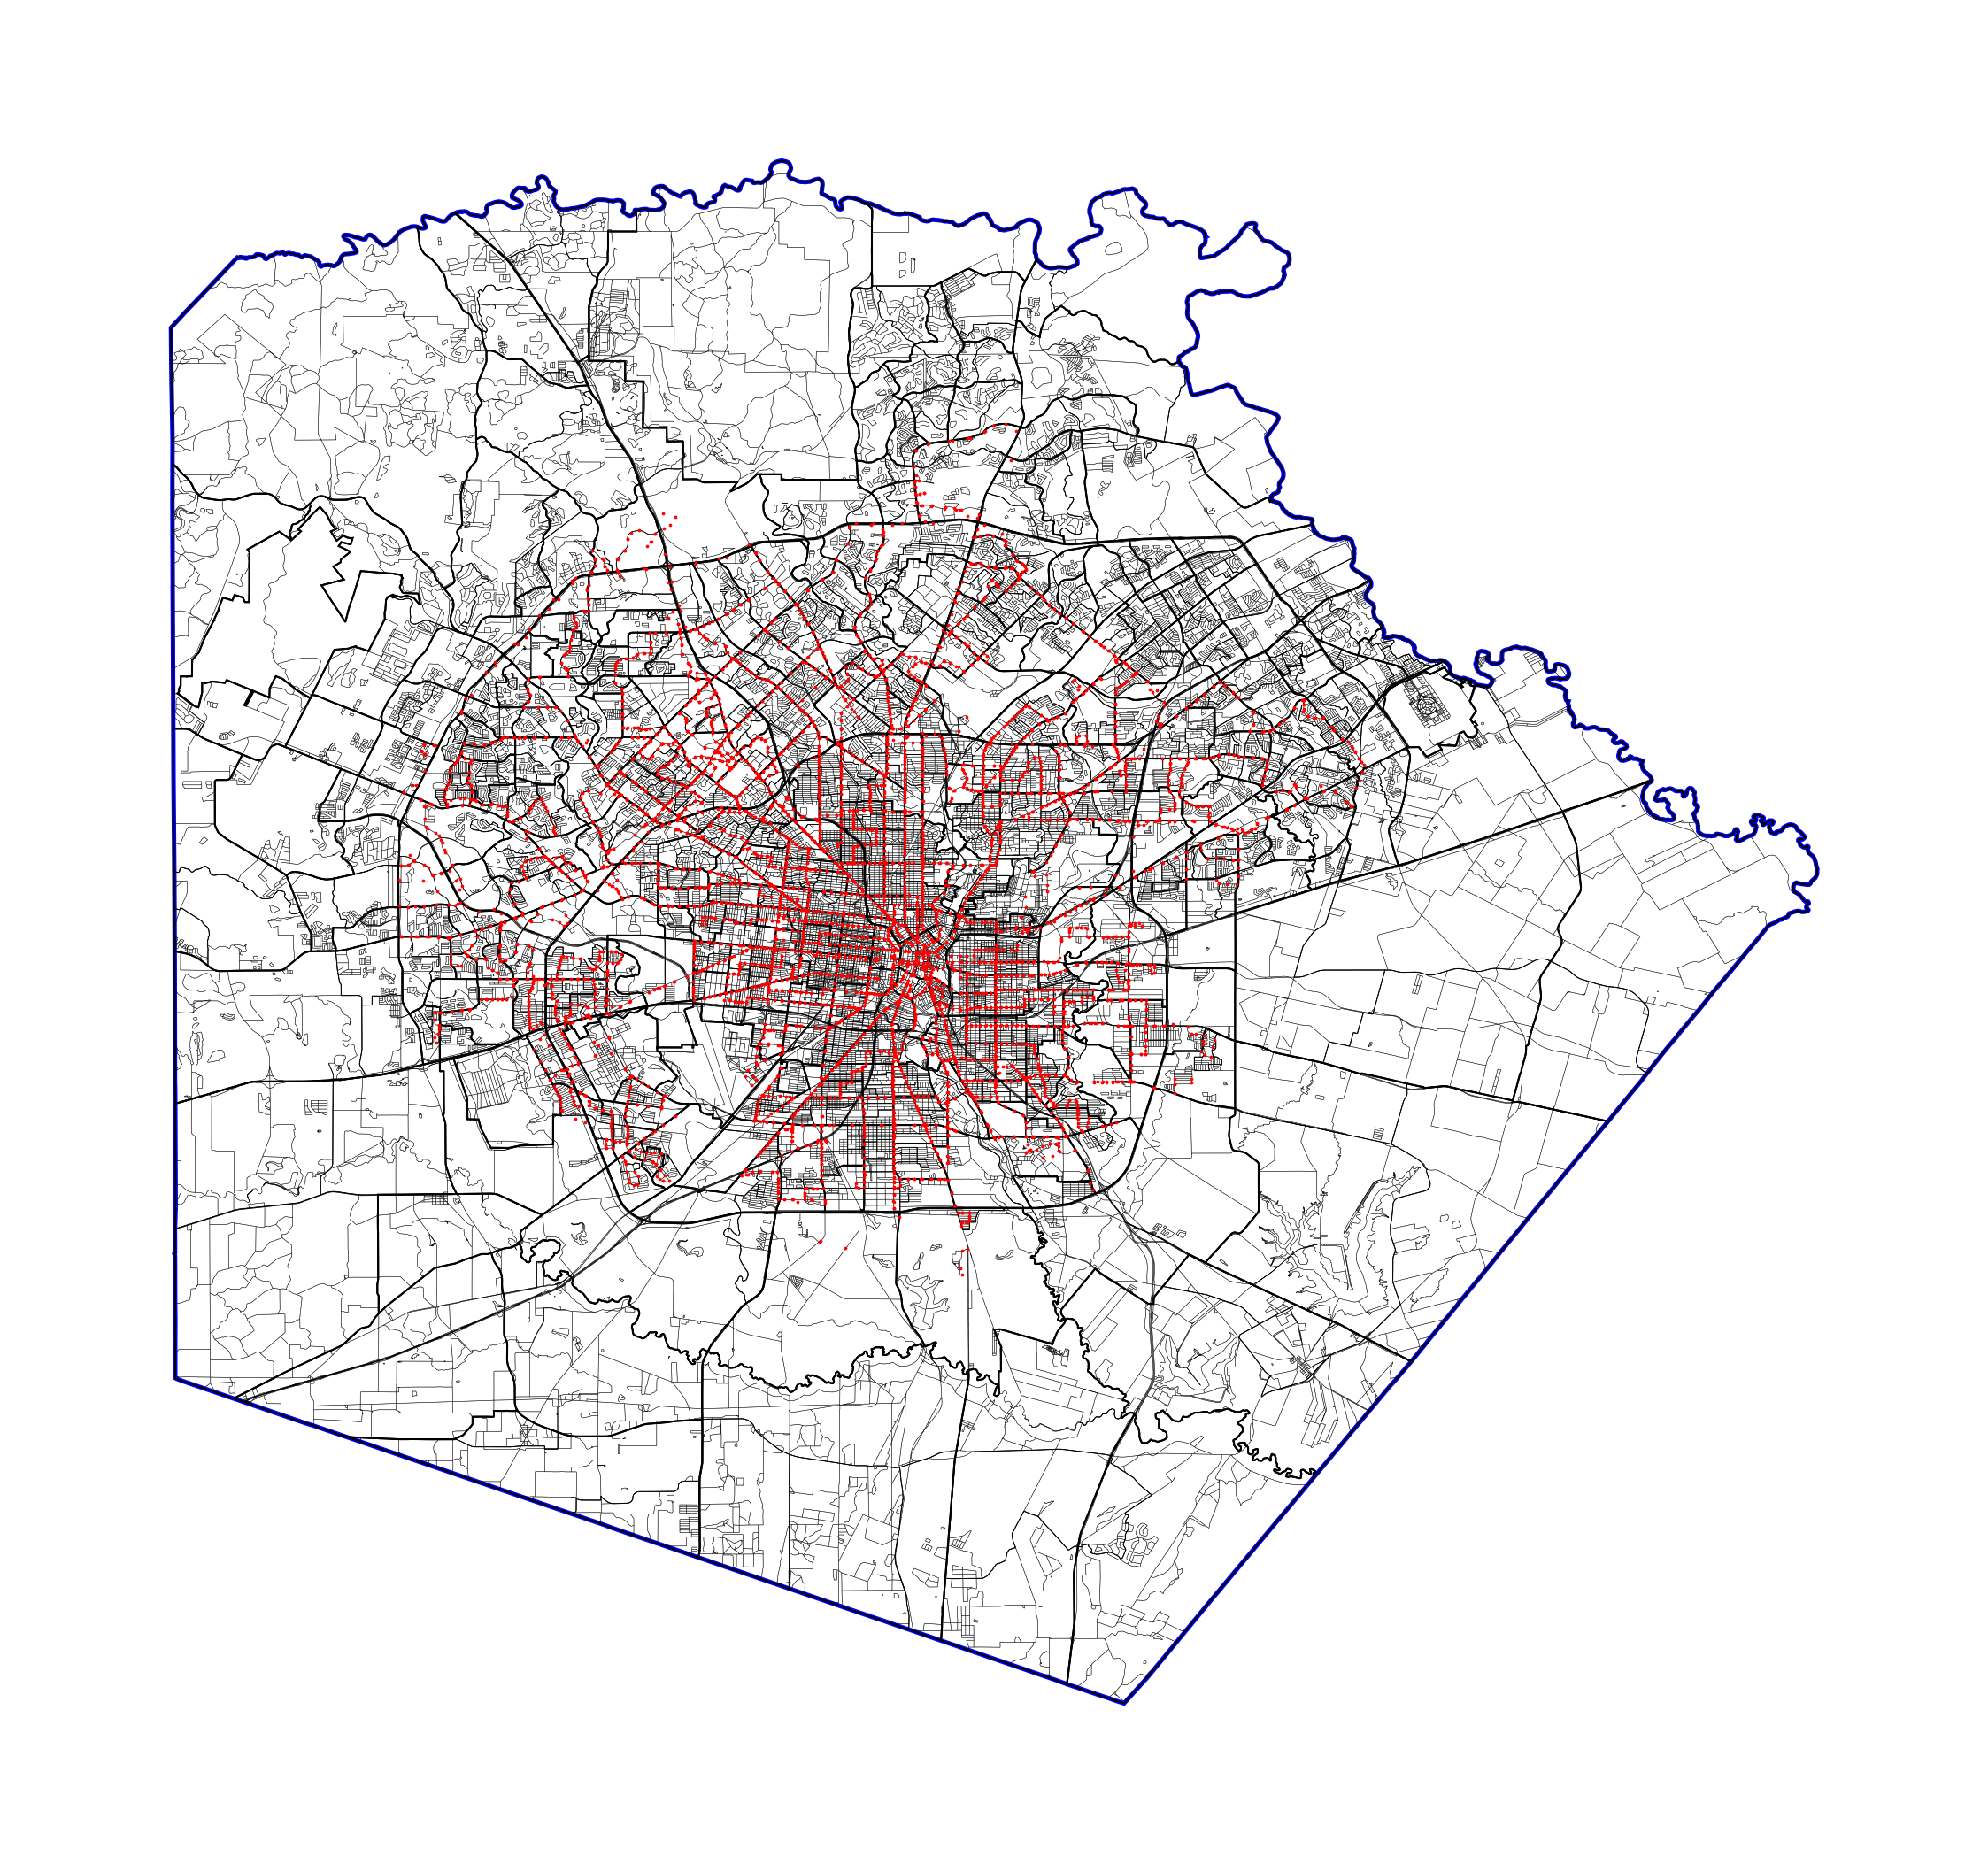

In [42]:
fig, ax = plt.subplots(figsize=(40,40))
ax.set_aspect('equal')
# plt.figure(figsize=(40,40))

# ax = gdf_county.plot(figsize=(40,40), color='white', edgecolor='blue', linewidth=5)
axbase = gplt.polyplot(gdf_county, ax=ax, facecolor='white', edgecolor='blue', linewidth=5)


# axb = gplt.choropleth(gdf_blocks, ax=ax, hue='density', edgecolor='none', cmap='Blues', alpha=0.75, linewidth=0)
# axbg = gplt.choropleth(gdf_block_groups, ax=ax, hue='density', cmap='Blues', edgecolor='black', alpha=.25, linewidth=1)

axt = gplt.polyplot(gdf_tracts, ax=ax, facecolor='none', edgecolor='black', alpha=1, linewidth=2)

axbg = gplt.polyplot(gdf_block_groups, ax=ax, facecolor='none', edgecolor='black', alpha=.75, linewidth=1)

axb = gplt.polyplot(gdf_blocks, ax=ax, facecolor='none', edgecolor='black', alpha=0.75, linewidth=.5)


ax1 = gdf_stops.plot(ax=ax, color='red', marker='.',markersize=30)
# ax1 = gplt.pointplot(gdf_stops, ax=ax, color='red')

# plt.savefig('figsave.png')
plt.show()

In [43]:
gdf_block_groups.crs

{'init': 'epsg:4326'}

In [115]:
gdf_stops_buff = gdf_stops.rename(columns={'geometry':'point'}).copy()

In [173]:
# For simplification, using distance per degree latitude to determine buffer amount. 
# This is slightly inaccurate due to the curvature of the earth. Buffer distances is
# set at 800 meters, which is roughly a half mile.

meters_per_degree = 111111
buffer_in_meters = 800
buffer_in_degrees = buffer_in_meters / meters_per_degree
buffer_in_degrees

0.0072000072000072

In [174]:
gdf_stops_buff['buffer'] = gdf_stops.buffer(buffer_in_degrees)

In [175]:
gdf_stops_buff = gdf_stops_buff.set_geometry('buffer')

In [176]:
gdf_stops_buff.head()

stop_code                       stop_name   stop_lat   stop_lon  \
stop_id                                                                    
25316        25316                BLANCO & DRESDEN  29.499014 -98.507783   
72479        72479     FRESNO & IH-10 W ACCESS RD.  29.474488 -98.516238   
56239        56239  FREDERICKSBURG RD. & N. FLORES  29.441883 -98.503773   
76759        76759                MARTIN & N. FRIO  29.430081 -98.503058   
88973        88973            DOLOROSA & S. FLORES  29.424073 -98.494741   

         wheelchair_boarding                       point  \
stop_id                                                    
25316                      0  POINT (-98.50778 29.49901)   
72479                      0  POINT (-98.51624 29.47449)   
56239                      0  POINT (-98.50377 29.44188)   
76759                      0  POINT (-98.50306 29.43008)   
88973                      0  POINT (-98.49474 29.42407)   

                                                    buffer  
stop_id                                                     
25316    POLYGON ((-98.50058 29.49901, -98.50062 29.498...  
72479    POLYGON ((-98.50904 29.47449, -98.50907 29.473...  
56239    POLYGON ((-98.49657 29.44188, -98.49661 29.441...  
76759    POLYGON ((-98.49586 29.43008, -98.49589 29.429...  
88973    POLYGON ((-98.48754 29.42407, -98.48758 29.423...

In [177]:
gdf_stops.head()

stop_code                       stop_name   stop_lat   stop_lon  \
stop_id                                                                    
25316        25316                BLANCO & DRESDEN  29.499014 -98.507783   
72479        72479     FRESNO & IH-10 W ACCESS RD.  29.474488 -98.516238   
56239        56239  FREDERICKSBURG RD. & N. FLORES  29.441883 -98.503773   
76759        76759                MARTIN & N. FRIO  29.430081 -98.503058   
88973        88973            DOLOROSA & S. FLORES  29.424073 -98.494741   

         wheelchair_boarding                    geometry  
stop_id                                                   
25316                      0  POINT (-98.50778 29.49901)  
72479                      0  POINT (-98.51624 29.47449)  
56239                      0  POINT (-98.50377 29.44188)  
76759                      0  POINT (-98.50306 29.43008)  
88973                      0  POINT (-98.49474 29.42407)

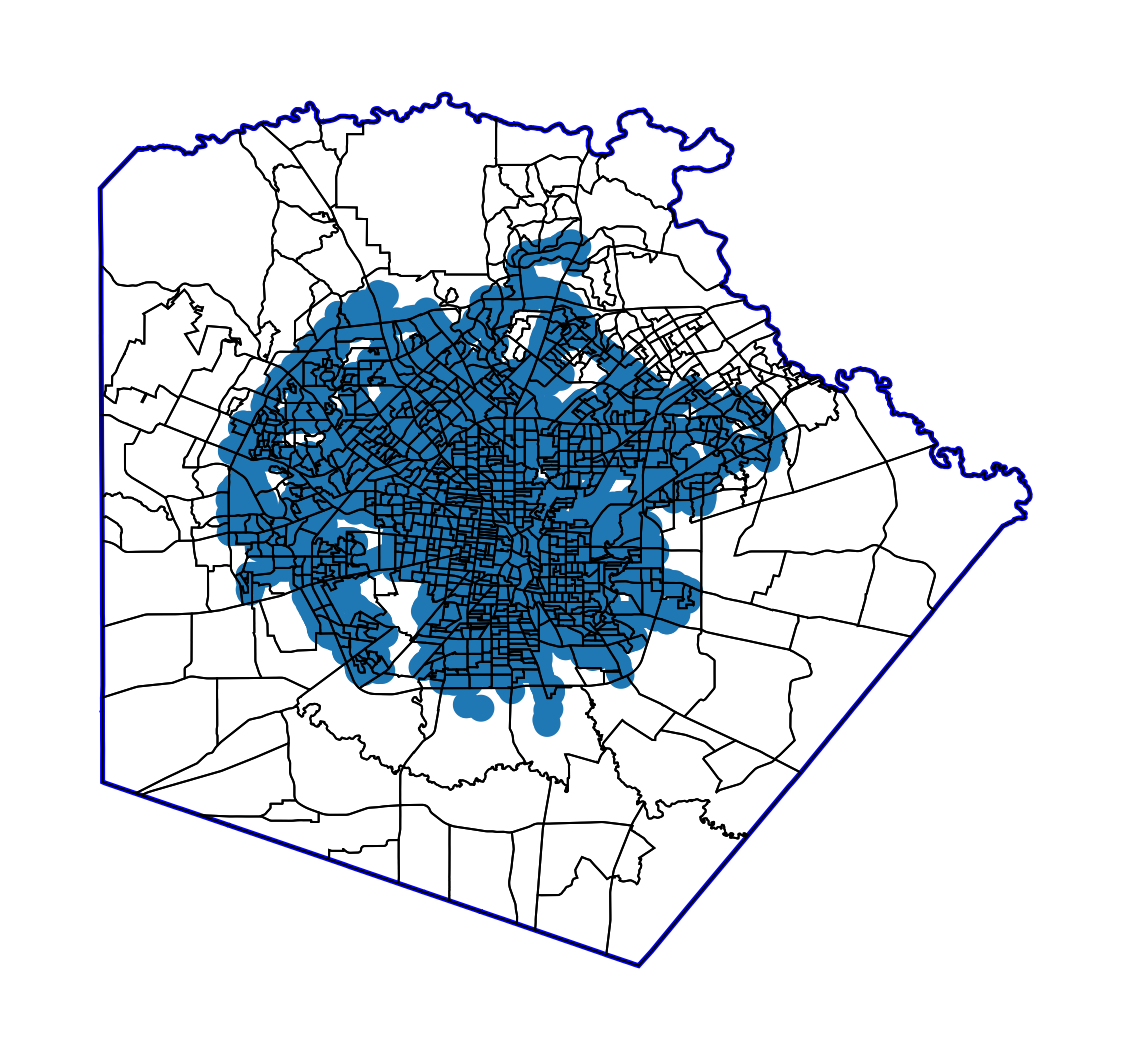

In [163]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')
axbase = gplt.polyplot(gdf_county, ax=ax, facecolor='white', edgecolor='blue', linewidth=5, zorder=1)
ax1 = gdf_stops_buff.plot(ax=ax, zorder=10)
axt = gplt.polyplot(gdf_block_groups[gdf_block_groups.], ax=ax, facecolor='none', edgecolor='black', alpha=1, linewidth=2, zorder=20)
plt.show()

In [145]:
gdf_stops_groups = gpd.sjoin(gdf_block_groups, gdf_stops_buff, how='inner', op='intersects')

In [146]:
gdf_stops_groups.head()

OBJECTID  SUM_POPULA    Shape_STAr    Shape_STLe    ShapeSTAre  \
480291101001         1         955  1.951706e+07  23279.128568  1.951706e+07   
480291101002         2         694  7.319464e+06  14609.297870  7.319464e+06   
480291101003         3        1730  1.133205e+07  14546.232289  1.133205e+07   
480291107001        11        1398  1.058370e+07  16998.776894  1.058370e+07   
480291108001        12         763  5.988346e+06  12016.387609  5.988346e+06   

                ShapeSTLen                                           geometry  \
480291101001  23279.128568  POLYGON ((-98.48695 29.43502, -98.48626 29.434...   
480291101002  14609.297870  POLYGON ((-98.48824 29.41933, -98.48826 29.418...   
480291101003  14546.232289  POLYGON ((-98.49432 29.43370, -98.49426 29.433...   
480291107001  16998.776894  POLYGON ((-98.50401 29.44202, -98.50386 29.441...   
480291108001  12016.387609  POLYGON ((-98.48941 29.44388, -98.48883 29.443...   

               density  index_right  stop_code               stop_name  \
480291101001  0.000547        59156      59156  MCCULLOUGH & EVERGREEN   
480291101002  0.000398        59156      59156  MCCULLOUGH & EVERGREEN   
480291101003  0.000991        59156      59156  MCCULLOUGH & EVERGREEN   
480291107001  0.000801        59156      59156  MCCULLOUGH & EVERGREEN   
480291108001  0.000437        59156      59156  MCCULLOUGH & EVERGREEN   

               stop_lat   stop_lon  wheelchair_boarding  \
480291101001  29.442698 -98.491798                    0   
480291101002  29.442698 -98.491798                    0   
480291101003  29.442698 -98.491798                    0   
480291107001  29.442698 -98.491798                    0   
480291108001  29.442698 -98.491798                    0   

                                   point  
480291101001  POINT (-98.49180 29.44270)  
480291101002  POINT (-98.49180 29.44270)  
480291101003  POINT (-98.49180 29.44270)  
480291107001  POINT (-98.49180 29.44270)  
480291108001  POINT (-98.49180 29.44270)

In [147]:
gdf_stops_groups.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 68699 entries, 480291101001 to 480291918171
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   OBJECTID             68699 non-null  int64   
 1   SUM_POPULA           68699 non-null  int64   
 2   Shape_STAr           68699 non-null  float64 
 3   Shape_STLe           68699 non-null  float64 
 4   ShapeSTAre           68699 non-null  float64 
 5   ShapeSTLen           68699 non-null  float64 
 6   geometry             68699 non-null  geometry
 7   density              68699 non-null  float64 
 8   index_right          68699 non-null  int64   
 9   stop_code            68699 non-null  int64   
 10  stop_name            68699 non-null  object  
 11  stop_lat             68699 non-null  float64 
 12  stop_lon             68699 non-null  float64 
 13  wheelchair_boarding  68699 non-null  int64   
 14  point                68699 non-null  geometry
dty

In [148]:
gdf_stops_groups.OBJECTID.value_counts()

1       314
3       270
11      260
2       259
1071    248
       ... 
543       2
173       2
379       2
214       1
215       1
Name: OBJECTID, Length: 963, dtype: int64

In [192]:
service_block_groups = gdf_stops_groups.index.unique().to_list()

In [194]:
gdf_block_groups.loc[service_block_groups]

OBJECTID  SUM_POPULA    Shape_STAr    Shape_STLe    ShapeSTAre  \
BLOCKGROUP                                                                     
480291101001         1         955  1.951706e+07  23279.128568  1.951706e+07   
480291101002         2         694  7.319464e+06  14609.297870  7.319464e+06   
480291101003         3        1730  1.133205e+07  14546.232289  1.133205e+07   
480291107001        11        1398  1.058370e+07  16998.776894  1.058370e+07   
480291108001        12         763  5.988346e+06  12016.387609  5.988346e+06   
...                ...         ...           ...           ...           ...   
480291918121      1049        2423  2.683240e+07  24577.976856  2.683240e+07   
480291918122      1050        1305  1.237991e+07  15550.683168  1.237990e+07   
480291918131      1051        4779  2.229088e+07  25018.571304  2.229088e+07   
480291918132      1052        1963  8.140270e+06  13623.458452  8.140270e+06   
480291918151      1055        2923  1.813303e+07  18197.689262  1.813303e+07   

                ShapeSTLen                                           geometry  \
BLOCKGROUP                                                                      
480291101001  23279.128568  POLYGON ((-98.48695 29.43502, -98.48626 29.434...   
480291101002  14609.297870  POLYGON ((-98.48824 29.41933, -98.48826 29.418...   
480291101003  14546.232289  POLYGON ((-98.49432 29.43370, -98.49426 29.433...   
480291107001  16998.776894  POLYGON ((-98.50401 29.44202, -98.50386 29.441...   
480291108001  12016.387609  POLYGON ((-98.48941 29.44388, -98.48883 29.443...   
...                    ...                                                ...   
480291918121  24577.976856  POLYGON ((-98.48258 29.66604, -98.48225 29.666...   
480291918122  15550.683168  POLYGON ((-98.48494 29.64831, -98.48379 29.647...   
480291918131  25018.571304  POLYGON ((-98.49332 29.64525, -98.49343 29.645...   
480291918132  13623.458452  POLYGON ((-98.49295 29.64556, -98.48988 29.643...   
480291918151  18197.689262  POLYGON ((-98.50723 29.63450, -98.50701 29.632...   

               density  
BLOCKGROUP              
480291101001  0.000547  
480291101002  0.000398  
480291101003  0.000991  
480291107001  0.000801  
480291108001  0.000437  
...                ...  
480291918121  0.001388  
480291918122  0.000748  
480291918131  0.002737  
480291918132  0.001124  
480291918151  0.001674  

[963 rows x 8 columns]

In [149]:
gdf_stops_groups.stop_code.value_counts()

61549    22
61543    21
71539    20
21506    20
76293    20
         ..
66856     1
98676     1
26206     1
26183     1
72293     1
Name: stop_code, Length: 6491, dtype: int64

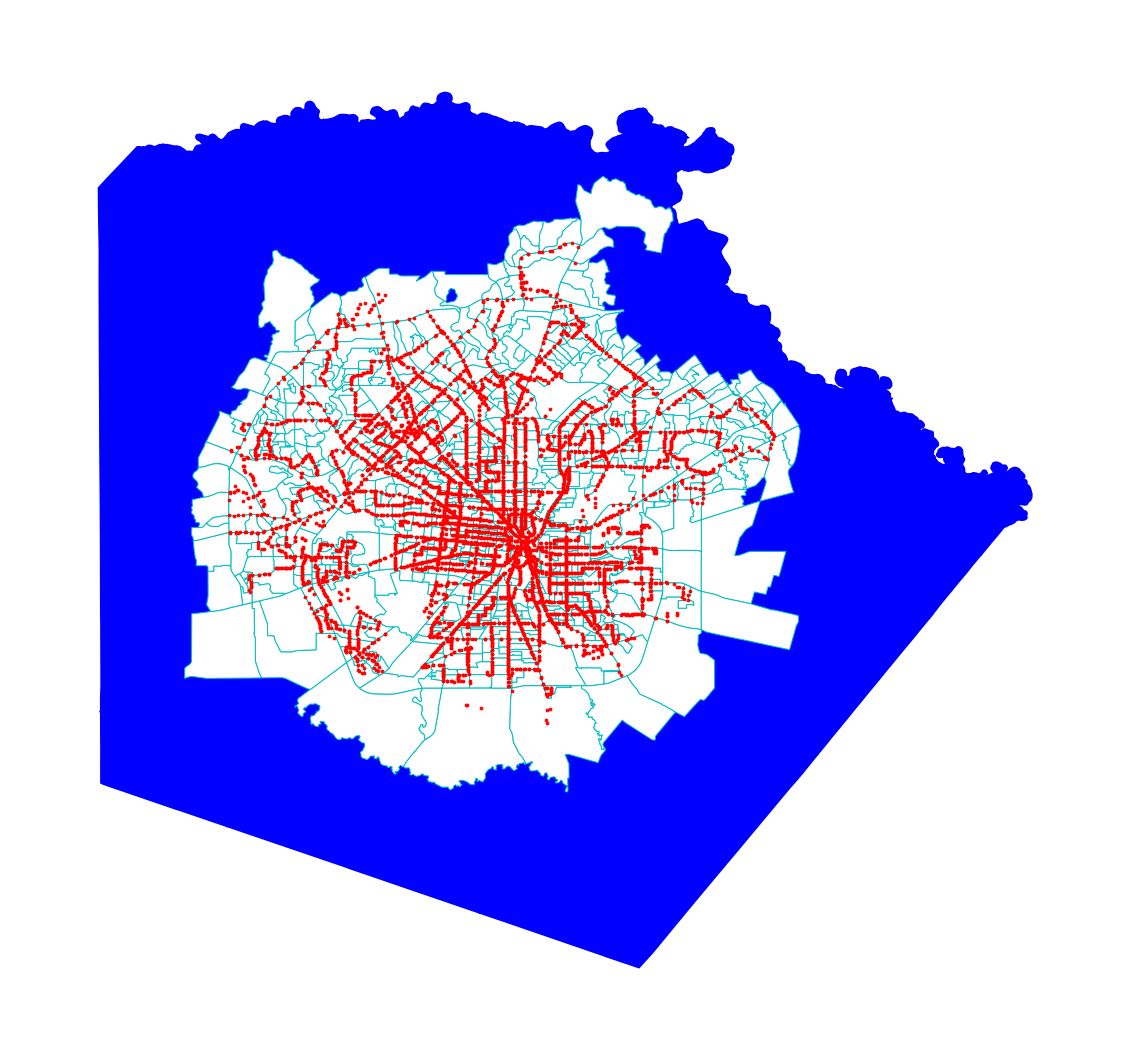

In [195]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')
axbase = gplt.polyplot(gdf_county, ax=ax, facecolor='b', edgecolor='blue', linewidth=5, zorder=1)
gplt.polyplot(gdf_block_groups.loc[service_block_groups], ax=ax, facecolor='white', edgecolor='c', alpha=1, zorder=10)
ax1 = gdf_stops.plot(ax=ax, color='red', marker='.',markersize=30, zorder=20)
axbase = gplt.polyplot(gdf_county, ax=ax, facecolor='b', edgecolor='blue', linewidth=5, alpha=0, zorder=100)
plt.show()

In [196]:
gdf_stops_blocks = gpd.sjoin(gdf_blocks, gdf_stops_buff, how='inner', op='intersects')

In [197]:
gdf_stops_blocks.head()

OBJECTID       ID  COLORING    BLOCKGROUP         MCD  \
480291919003005         1  1400310         4  480291919003  4802993407   
480291919002037     12899  1519783         3  480291919002  4802993407   
480291919001059     15233  1398520         3  480291919001  4802993407   
480291919001052     15234  1398537         1  480291919001  4802993407   
480291919001051     15235  1398555         0  480291919001  4802993407   

                   PLACE        VTD CONGRESS LOWERSLD UPPERSLD  ...  \
480291919003005  4865000  480294004     4821    48120    48019  ...   
480291919002037  4865000  480294004     4821    48120    48019  ...   
480291919001059  4865000  480294004     4821    48120    48019  ...   
480291919001052  4865000  480294004     4821    48120    48019  ...   
480291919001051  4865000  480294004     4821    48120    48019  ...   

                  ShapeSTLen   density  \
480291919003005  1063.271402  0.247499   
480291919002037  1262.341718  0.114230   
480291919001059  1422.540068  0.418845   
480291919001052  1416.902264  0.342691   
480291919001051  1334.014457  0.000000   

                                                          geometry  \
480291919003005  POLYGON ((-98.46781 29.42506, -98.46783 29.424...   
480291919002037  POLYGON ((-98.46749 29.42569, -98.46750 29.425...   
480291919001059  POLYGON ((-98.47326 29.42442, -98.47326 29.423...   
480291919001052  POLYGON ((-98.47325 29.42507, -98.47326 29.424...   
480291919001051  POLYGON ((-98.47326 29.42560, -98.47325 29.425...   

                 index_right  stop_code                   stop_name  stop_lat  \
480291919003005        95783      95783  E. COMMERCE & S. HACKBERRY  29.42051   
480291919002037        95783      95783  E. COMMERCE & S. HACKBERRY  29.42051   
480291919001059        95783      95783  E. COMMERCE & S. HACKBERRY  29.42051   
480291919001052        95783      95783  E. COMMERCE & S. HACKBERRY  29.42051   
480291919001051        95783      95783  E. COMMERCE & S. HACKBERRY  29.42051   

                  stop_lon  wheelchair_boarding                       point  
480291919003005 -98.473362                    0  POINT (-98.47336 29.42051)  
480291919002037 -98.473362                    0  POINT (-98.47336 29.42051)  
480291919001059 -98.473362                    0  POINT (-98.47336 29.42051)  
480291919001052 -98.473362                    0  POINT (-98.47336 29.42051)  
480291919001051 -98.473362                    0  POINT (-98.47336 29.42051)  

[5 rows x 29 columns]

In [198]:
gdf_stops_blocks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 463021 entries, 480291919003005 to 480291212032004
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   OBJECTID             463021 non-null  int64   
 1   ID                   463021 non-null  int64   
 2   COLORING             463021 non-null  int64   
 3   BLOCKGROUP           463021 non-null  object  
 4   MCD                  463021 non-null  object  
 5   PLACE                458193 non-null  object  
 6   VTD                  463021 non-null  object  
 7   CONGRESS             463021 non-null  object  
 8   LOWERSLD             463021 non-null  object  
 9   UPPERSLD             463021 non-null  object  
 10  UNIFSCHOOL           463021 non-null  object  
 11  POPULATION           463021 non-null  int64   
 12  HISPANIC_O           463021 non-null  int64   
 13  NOT_HISPAN           463021 non-null  int64   
 14  NH_WHT               46302

In [199]:
gdf_stops_blocks.OBJECTID.value_counts()

15314    107
13509    101
13512    101
13513     99
15339     98
        ... 
10213      1
11785      1
4253       1
10248      1
14745      1
Name: OBJECTID, Length: 18856, dtype: int64

In [200]:
service_blocks = gdf_stops_blocks.index.unique().to_list()

In [201]:
gdf_blocks.loc[service_blocks]

OBJECTID       ID  COLORING    BLOCKGROUP         MCD  \
BLOCK                                                                    
480291919003005         1  1400310         4  480291919003  4802993407   
480291919002037     12899  1519783         3  480291919002  4802993407   
480291919001059     15233  1398520         3  480291919001  4802993407   
480291919001052     15234  1398537         1  480291919001  4802993407   
480291919001051     15235  1398555         0  480291919001  4802993407   
...                   ...      ...       ...           ...         ...   
480291218031013     24666  2103368         0  480291218031  4802993411   
480291212032000     24924  2022836         1  480291212032  4802993411   
480291212032004     24925  2022854         1  480291212032  4802993411   
480291212031022     24830  2020258         4  480291212031  4802993411   
480291215043010     24853  2096706         2  480291215043  4802993411   

                   PLACE        VTD CONGRESS LOWERSLD UPPERSLD  ...  \
BLOCK                                                           ...   
480291919003005  4865000  480294004     4821    48120    48019  ...   
480291919002037  4865000  480294004     4821    48120    48019  ...   
480291919001059  4865000  480294004     4821    48120    48019  ...   
480291919001052  4865000  480294004     4821    48120    48019  ...   
480291919001051  4865000  480294004     4821    48120    48019  ...   
...                  ...        ...      ...      ...      ...  ...   
480291218031013  4865000  480294093     4821    48119    48025  ...   
480291212032000  4865000  480294022     4821    48121    48025  ...   
480291212032004  4865000  480294022     4821    48121    48025  ...   
480291212031022  4865000  480294022     4821    48121    48025  ...   
480291215043010  4865000  480294052     4821    48121    48021  ...   

                HISPANIC_O  NOT_HISPAN  NH_WHT  NH_BLK  NH_ASN  gecovector  \
BLOCK                                                                        
480291919003005         11           2       0       0       0    0.001038   
480291919002037          6           0       0       0       0    0.002774   
480291919001059         18           4       2       1       0    0.004063   
480291919001052         12           6       3       2       0    0.004010   
480291919001051          0           0       0       0       0    0.003295   
...                    ...         ...     ...     ...     ...         ...   
480291218031013          0           0       0       0       0    0.007029   
480291212032000          0           0       0       0       0    0.003316   
480291212032004          0           0       0       0       0    0.003533   
480291212031022          2           0       0       0       0    0.071597   
480291215043010          0          16      10       4       2    0.004509   

                   ShapeSTAre   ShapeSTLen   density  \
BLOCK                                                  
480291919003005  2.889612e+04  1063.271402  0.247499   
480291919002037  7.727385e+04  1262.341718  0.114230   
480291919001059  1.130953e+05  1422.540068  0.418845   
480291919001052  1.116176e+05  1416.902264  0.342691   
480291919001051  9.170819e+04  1334.014457  0.000000   
...                       ...          ...       ...   
480291218031013  1.956546e+05  5806.743737  0.000000   
480291212032000  9.230211e+04  3058.964057  0.000000   
480291212032004  9.835754e+04  3584.640960  0.000000   
480291212031022  1.993119e+06  5975.083509  0.038077   
480291215043010  1.255104e+05  1512.845967  0.304615   

                                                          geometry  
BLOCK                                                               
480291919003005  POLYGON ((-98.46781 29.42506, -98.46783 29.424...  
480291919002037  POLYGON ((-98.46749 29.42569, -98.46750 29.425...  
480291919001059  POLYGON ((-98.47326 29.42442, -98.47326 29.423...  
480291919001052  POLYGON ((-98.47325 29.4

In [202]:
gdf_stops_blocks.stop_code.value_counts()

72553    213
82349    212
72559    212
71533    211
71499    211
        ... 
72293      7
99377      6
99376      6
26183      2
75379      1
Name: stop_code, Length: 6491, dtype: int64

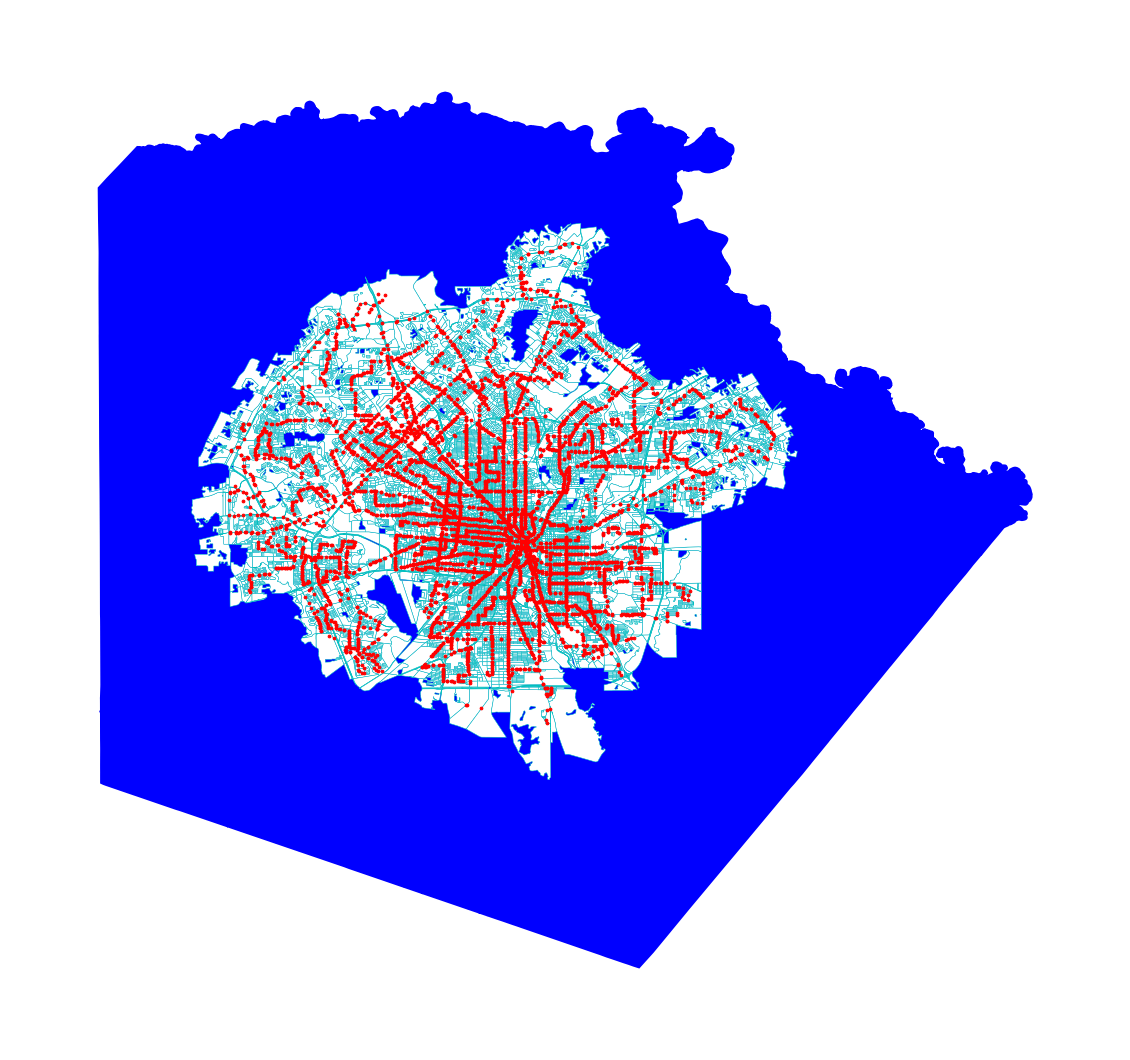

In [204]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')
axbase = gplt.polyplot(gdf_county, ax=ax, facecolor='b', edgecolor='blue', linewidth=5, zorder=1)
gplt.polyplot(gdf_blocks.loc[service_blocks], ax=ax, facecolor='white', edgecolor='c', linewidth=.25, alpha=1, zorder=10)
ax1 = gdf_stops.plot(ax=ax, color='red', marker='.',markersize=30, zorder=20)
axbase = gplt.polyplot(gdf_county, ax=ax, facecolor='b', edgecolor='blue', linewidth=5, alpha=0, zorder=100)
plt.show()